## Python for Data Analysis Chapter9

### 그래프와 시각화

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
import pandas as pd

In [6]:
data = np.arange(10)

In [7]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

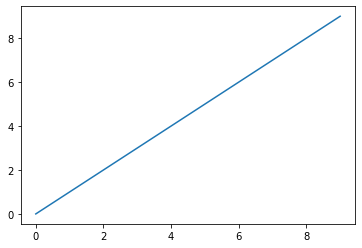

In [8]:
plt.plot(data)

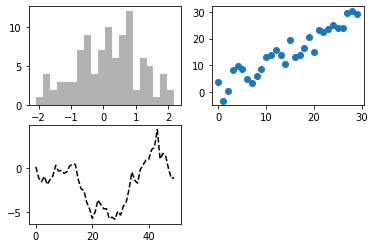

In [21]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')
_ = ax1.hist(np.random.randn(100),bins=20,color='k',alpha=0.3)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

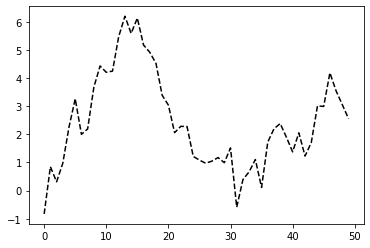

In [17]:
plt.plot(np.random.randn(50).cumsum(),'k--')

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

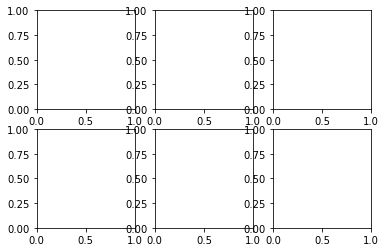

In [22]:
fig, axes = plt.subplots(2,3)
axes

서브플롯 간의 간격 조절 subplots_adjust()

색상, 마커, 선 스타일

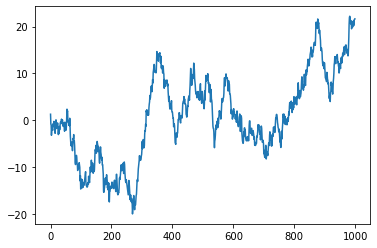

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.random.randn(1000).cumsum())

그래프를 파일로 저장하기
plt.savefig('.svg')

In [25]:
df = pd.DataFrame(np.random.randn(10,4).cumsum(0),
                 columns=['A','B','C','D'],
                 index=np.arange(0,100,10))

<AxesSubplot:>

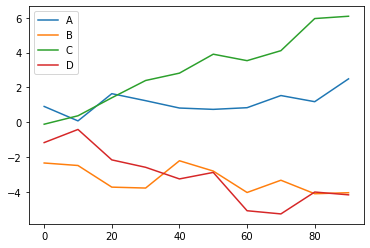

In [27]:
df.plot()

df.plot.bar(),
df.plot.barh(stacked=True, alpha=0.5)

In [28]:
import seaborn as sns

sns.barplot(), 
sns.pairplot()

## Python for Data Analysis Chapter10

### 데이터 집계와 그룹 연산

In [30]:
tips = pd.read_csv('tips.csv')

In [32]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one','two','one','two','one'],
                  'data1':np.random.randn(5),
                  'data2':np.random.randn(5)})

In [33]:
df

,key1,key2,data1,data2
0,a,one,1.122639,-0.962702
1,a,two,1.382447,0.145027
2,b,one,0.089520,1.245024
3,b,two,0.891415,-0.832239
4,a,one,1.280790,-0.309674


In [34]:
grouped = df['data1'].groupby(df['key1'])

In [35]:
grouped

In [36]:
grouped.mean()

key1
a    1.261959
b    0.490468
Name: data1, dtype: float64

In [37]:
means = df['data1'].groupby([df['key1'],df['key2']]).mean()

In [38]:
means

key1  key2
a     one     1.201715
      two     1.382447
b     one     0.089520
      two     0.891415
Name: data1, dtype: float64

In [39]:
means.unstack()

key2,one,two
key1,,
a,1.201715,1.382447
b,0.089520,0.891415


In [40]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,1.261959,-0.375783
b,0.490468,0.206393


In [41]:
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

In [42]:
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.122639 -0.962702
1    a  two  1.382447  0.145027
4    a  one  1.280790 -0.309674
b
  key1 key2     data1     data2
2    b  one  0.089520  1.245024
3    b  two  0.891415 -0.832239


In [44]:
pieces = dict(list(df.groupby('key1')))

In [46]:
pieces['b']

,key1,key2,data1,data2
2,b,one,0.089520,1.245024
3,b,two,0.891415,-0.832239


dtype에 따라 그룹으로 묶기 가능

In [50]:
df.groupby('key1')['data1']
df.groupby('key1')[['data2']]

In [51]:
df['data1'].groupby(df['key1'])

In [57]:
df = df.iloc[:,[2,3,0,1]]

In [58]:
df

,data1,data2,key1,key2
0,1.122639,-0.962702,a,one
1,1.382447,0.145027,a,two
2,0.089520,1.245024,b,one
3,0.891415,-0.832239,b,two
4,1.280790,-0.309674,a,one


In [59]:
grouped = df.groupby('key1')

In [60]:
grouped['data1'].quantile(0.9)

key1
a    1.362115
b    0.811226
Name: data1, dtype: float64

In [62]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  1.261959  0.130924  1.122639  1.201715  1.280790  1.331618   
b      2.0  0.490468  0.567025  0.089520  0.289994  0.490468  0.690941   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.382447   3.0 -0.375783  0.556816 -0.962702 -0.636188 -0.309674   
b     0.891415   2.0  0.206393  1.468847 -0.832239 -0.312923  0.206393   

                          
           75%       max  
key1                      
a    -0.082323  0.145027  
b     0.725709  1.245024

In [64]:
tips['tip_pct'] = tips['tip']/tips['total_bill']

In [66]:
tips[:6]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808
5,25.29,4.71,No,Sun,Dinner,4,0.186240


In [67]:
grouped = tips.groupby(['day','smoker'])

In [68]:
grouped_pct = grouped['tip_pct']

In [69]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

색인되지 않은 형태로 집계된 데이터 반환하기

reset_index 메서드를 호출해도 같은 결과

In [70]:
tips.groupby(['day','smoker'],as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


In [71]:
def top(df, n=5, column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [72]:
top(tips, n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [73]:
tips.groupby('smoker').apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker                                                           
No     88        24.71  5.85     No  Thur   Lunch     2  0.236746
       185       20.69  5.00     No   Sun  Dinner     5  0.241663
       51        10.29  2.60     No   Sun  Dinner     2  0.252672
       149        7.51  2.00     No  Thur   Lunch     2  0.266312
       232       11.61  3.39     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Yes   Sun  Dinner     2  0.710345

In [75]:
s = pd.Series(np.random.randn(6))
s[::2]=np.nan

In [76]:
s

0         NaN
1    0.508445
2         NaN
3   -1.985912
4         NaN
5   -1.193791
dtype: float64

In [77]:
s.fillna(s.mean())

0   -0.890419
1    0.508445
2   -0.890419
3   -1.985912
4   -0.890419
5   -1.193791
dtype: float64

In [78]:
tips.pivot_table(index=['day','smoker'])

size       tip   tip_pct  total_bill
day  smoker                                          
Fri  No      2.250000  2.812500  0.151650   18.420000
     Yes     2.066667  2.714000  0.174783   16.813333
Sat  No      2.555556  3.102889  0.158048   19.661778
     Yes     2.476190  2.875476  0.147906   21.276667
Sun  No      2.929825  3.167895  0.160113   20.506667
     Yes     2.578947  3.516842  0.187250   24.120000
Thur No      2.488889  2.673778  0.160298   17.113111
     Yes     2.352941  3.030000  0.163863   19.190588

## Python for Data Analysis Chapter11

### 시계열

날짜, 시간 자료형, 도구

In [79]:
from datetime import datetime

In [80]:
now = datetime.now()

In [81]:
now

datetime.datetime(2022, 4, 5, 15, 4, 42, 184570)

In [82]:
now.year, now.month, now.day

(2022, 4, 5)

In [83]:
delta = datetime(2011,1,7)-datetime(2008,6,24,8,15)

In [84]:
delta

datetime.timedelta(days=926, seconds=56700)

In [85]:
delta.days

926

In [86]:
delta.seconds

56700

In [87]:
from datetime import timedelta

In [88]:
start = datetime(2011,1,7)

In [89]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

문자열을 datetime으로 변환하기

In [91]:
stamp = datetime(2011,1,3)
str(stamp)

'2011-01-03 00:00:00'

In [93]:
stamp.strftime('%y-%m-%d')

'11-01-03'

datetime.strptime을 사용하여 문자열을 날짜로 변환

In [94]:
from dateutil.parser import parse

In [95]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [96]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [99]:
longer_ts = pd.Series(np.random.randn(1000),
                     index=pd.date_range('1/1/2000',periods=1000))

In [100]:
longer_ts

2000-01-01    0.208389
2000-01-02    0.623058
2000-01-03   -0.930698
2000-01-04    0.028759
2000-01-05   -0.482083
                ...   
2002-09-22   -0.295296
2002-09-23   -1.636207
2002-09-24   -1.119946
2002-09-25    0.239972
2002-09-26   -0.154185
Freq: D, Length: 1000, dtype: float64

In [101]:
longer_ts['2001']

2001-01-01    1.522632
2001-01-02    1.074732
2001-01-03    1.377222
2001-01-04   -0.892696
2001-01-05   -0.009630
                ...   
2001-12-27    1.108529
2001-12-28   -0.227037
2001-12-29    0.293430
2001-12-30    1.555437
2001-12-31    0.166553
Freq: D, Length: 365, dtype: float64

날짜 범위 생성하기

In [102]:
index = pd.date_range('2012-04-01','2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [104]:
pd.date_range(start='2012-04-01',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [105]:
pd.date_range(end='2012-04-01',periods=20)

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-17', '2012-03-18', '2012-03-19', '2012-03-20',
               '2012-03-21', '2012-03-22', '2012-03-23', '2012-03-24',
               '2012-03-25', '2012-03-26', '2012-03-27', '2012-03-28',
               '2012-03-29', '2012-03-30', '2012-03-31', '2012-04-01'],
              dtype='datetime64[ns]', freq='D')

In [106]:
pd.date_range('2012-01-01','2012-12-01',freq='BM') #BM 월 영업마감일

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30',
               '2012-05-31', '2012-06-29', '2012-07-31', '2012-08-31',
               '2012-09-28', '2012-10-31', '2012-11-30'],
              dtype='datetime64[ns]', freq='BM')

자정에 맞추어 타임스탬프를 정규화 하려면 normalize=True 옵션 사용

In [109]:
from pandas.tseries.offsets import Hour, Minute

In [110]:
hour = Hour()

In [111]:
hour

<Hour>

In [112]:
four_hour = Hour(4)

In [113]:
four_hour

<4 * Hours>

##### '월별주차' 매월 3쨰주 금요일

In [116]:
rng = pd.date_range('2022-01-01','2022-09-01',freq='WOM-3FRI')

In [117]:
list(rng)

[Timestamp('2022-01-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-02-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-03-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-04-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-05-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-06-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-07-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2022-08-19 00:00:00', freq='WOM-3FRI')]

##### 데이터 시프트

In [118]:
ts = pd.Series(np.random.randn(4),
              index = pd.date_range('1/1/2000',periods=4,freq='M'))

In [119]:
ts

2000-01-31   -1.894196
2000-02-29    0.009585
2000-03-31   -1.063950
2000-04-30    0.099375
Freq: M, dtype: float64

In [120]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -1.894196
2000-04-30    0.009585
Freq: M, dtype: float64

In [121]:
ts.shift(1,freq='M')

2000-02-29   -1.894196
2000-03-31    0.009585
2000-04-30   -1.063950
2000-05-31    0.099375
Freq: M, dtype: float64

In [122]:
ts.shift(2,freq='D')

2000-02-02   -1.894196
2000-03-02    0.009585
2000-04-02   -1.063950
2000-05-02    0.099375
dtype: float64

기간과 기간 연산

In [123]:
p = pd.Period(2007,freq='A-DEC')

In [124]:
p

Period('2007', 'A-DEC')

In [125]:
p+5

Period('2012', 'A-DEC')

#### 리샘플링 ts.resample('M').mean()

#### OHLC 리샘플링

시가 open 고가 high 저가 low 종가 close

업샘플링과 보간

In [126]:
frame = pd.DataFrame(np.random.randn(2,4),
                    index=pd.date_range('1/1/2000',periods=2,
                                       freq='W-WED'),
                    columns = ['Colorado','Texas','New York','Ohio'])

In [127]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.857215,0.307459,0.000533,2.150442
2000-01-12,-0.646076,-0.224984,0.061740,-0.603676


In [129]:
df_daily = frame.resample('D').asfreq()

In [130]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.857215,0.307459,0.000533,2.150442
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.646076,-0.224984,0.061740,-0.603676


In [131]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.857215,0.307459,0.000533,2.150442
2000-01-06,-0.857215,0.307459,0.000533,2.150442
2000-01-07,-0.857215,0.307459,0.000533,2.150442
2000-01-08,-0.857215,0.307459,0.000533,2.150442
2000-01-09,-0.857215,0.307459,0.000533,2.150442
2000-01-10,-0.857215,0.307459,0.000533,2.150442
2000-01-11,-0.857215,0.307459,0.000533,2.150442
2000-01-12,-0.646076,-0.224984,0.061740,-0.603676


In [132]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.857215,0.307459,0.000533,2.150442
2000-01-06,-0.857215,0.307459,0.000533,2.150442
2000-01-07,-0.857215,0.307459,0.000533,2.150442
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.646076,-0.224984,0.061740,-0.603676


In [133]:
close_px_all = pd.read_csv('stock_px_2.csv',parse_dates=True,index_col=0)

In [134]:
close_px = close_px_all[['AAPL','MSFT','XOM']]

In [135]:
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

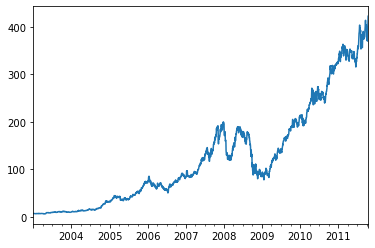

In [136]:
close_px.AAPL.plot()

<AxesSubplot:>

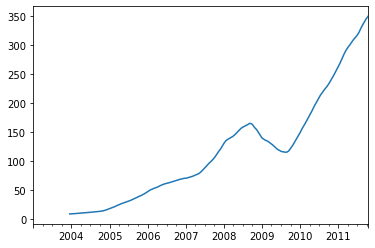

In [137]:
close_px.AAPL.rolling(250).mean().plot()

In [138]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 지수 가중 함수

최근 값에 좀 더 많은 가중치를 두는 방법

In [140]:
aapl_px = close_px.AAPL['2006':'2007']

In [142]:
ma60 = aapl_px.rolling(30,min_periods=20).mean()

In [143]:
ewma60 = aapl_px.ewm(span=30).mean()

<AxesSubplot:>

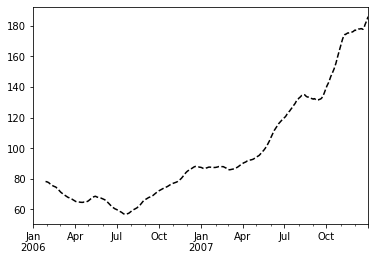

In [144]:
ma60.plot(style='k--',label='Simple MA')

In [148]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

In [149]:
corr = returns.rolling(125,min_periods=100).corr(spx_rets)

<AxesSubplot:>

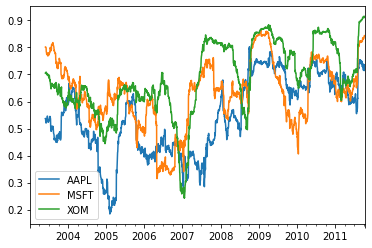

In [150]:
corr.plot()